In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("varunchawla30/german-credit-data")

print("Path to dataset files:", path)

c:\Users\kohom\oop\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 12.4k/12.4k [00:00<00:00, 13.8MB/s]

Extracting files...
Path to dataset files: C:\Users\kohom\.cache\kagglehub\datasets\varunchawla30\german-credit-data\versions\1


In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import shap

c:\Users\kohom\oop\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df = pd.read_csv('german_credit_data.csv', sep=",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   laufkont  1000 non-null   int64
 1   laufzeit  1000 non-null   int64
 2   moral     1000 non-null   int64
 3   verw      1000 non-null   int64
 4   hoehe     1000 non-null   int64
 5   sparkont  1000 non-null   int64
 6   beszeit   1000 non-null   int64
 7   rate      1000 non-null   int64
 8   famges    1000 non-null   int64
 9   buerge    1000 non-null   int64
 10  wohnzeit  1000 non-null   int64
 11  verm      1000 non-null   int64
 12  alter     1000 non-null   int64
 13  weitkred  1000 non-null   int64
 14  wohn      1000 non-null   int64
 15  bishkred  1000 non-null   int64
 16  beruf     1000 non-null   int64
 17  pers      1000 non-null   int64
 18  telef     1000 non-null   int64
 19  gastarb   1000 non-null   int64
 20  kredit    1000 non-null   int64
dtypes: int64(21)
memory usage: 164.2 KB


In [4]:
df.columns = ['account_status', 'duration', 'credit_history', 'purpose', 
              'amount', 'savings', 'employment', 'installment_rate', 
              'personal_status', 'guarantors', 'residence_since', 'property', 
              'age', 'other_installments', 'housing', 'existing_credits', 
              'job', 'dependents', 'telephone', 'foreign_worker', 'credit_risk']

In [5]:
df.head()

,account_status,duration,credit_history,purpose,amount,savings,employment,installment_rate,personal_status,guarantors,...,property,age,other_installments,housing,existing_credits,job,dependents,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [6]:
df.describe()

,account_status,duration,credit_history,purpose,amount,savings,employment,installment_rate,personal_status,guarantors,...,property,age,other_installments,housing,existing_credits,job,dependents,telephone,foreign_worker,credit_risk
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,...,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,1.145000,...,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.845000,1.404000,1.963000,0.700000
std,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,0.477706,...,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,1.000000,...,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000
50%,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,1.000000,...,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000
75%,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,1.000000,...,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000
max,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,3.000000,...,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000


$laufkont = status

1 : no checking account
2 : … < 0 DM 
3 : 0<= … < 200 DM 
4 : … >= 200 DM / salary for at least 1 year

$laufzeit = duration

$moral = credit_history

0 : delay in paying off in the past
1 : critical account/other credits elsewhere
2 : no credits taken/all credits paid back duly
3 : existing credits paid back duly till now
4 : all credits at this bank paid back duly

$verw = purpose

0 : others
1 : car (new)
2 : car (used)
3 : furniture/equipment
4 : radio/television
5 : domestic appliances
6 : repairs
7 : education
8 : vacation
9 : retraining
10 : business

$hoehe = amount

$sparkont = savings

1 : unknown/no savings account
2 : … < 100 DM 
3 : 100 <= … < 500 DM 
4 : 500 <= … < 1000 DM 
5 : … >= 1000 DM

$beszeit = employment_duration

1 : unemployed
2 : < 1 yr 
3 : 1 <= … < 4 yrs 
4 : 4 <= … < 7 yrs 
5 : >= 7 yrs

$rate = installment_rate

1 : >= 35
2 : 25 <= … < 35
3 : 20 <= … < 25
4 : < 20

$famges = personal_status_sex

1 : male : divorced/separated
2 : female : non-single or male : single
3 : male : married/widowed
4 : female : single

$buerge = other_debtors

1 : none
2 : co-applicant
3 : guarantor

$wohnzeit = present_residence

1 : < 1 yr 
2 : 1 <= … < 4 yrs 
3 : 4 <= … < 7 yrs 
4 : >= 7 yrs

$verm = property

1 : unknown / no property
2 : car or other
3 : building soc. savings agr./life insurance
4 : real estate

$alter = age

$weitkred = other_installment_plans

1 : bank
2 : stores
3 : none

$wohn = housing

1 : for free
2 : rent
3 : own

$bishkred = existing_credits

1 : 1
2 : 2-3
3 : 4-5
4 : >= 6

$beruf = job

1 : unemployed/unskilled - non-resident
2 : unskilled - resident
3 : skilled employee/official
4 : manager/self-empl./highly qualif. employee

$pers = dependents

1 : 3 or more
2 : 0 to 2

$telef = telephone

1 : no
2 : yes (under customer name)

$gastarb = foreign_worker

1 : yes
2 : no

$kredit = credit_risk

0 : bad
1 : good

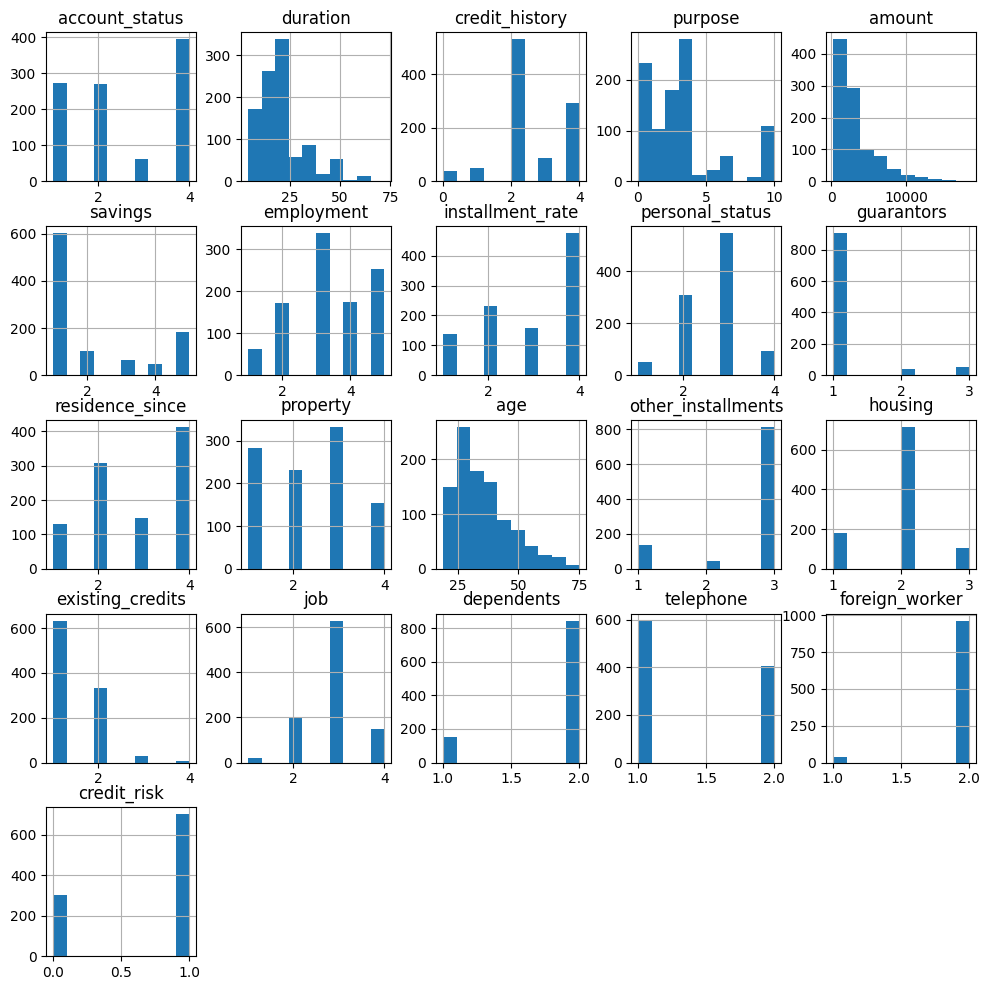

In [8]:
df.hist(figsize=(12,12))
plt.tight_layout
plt.show()

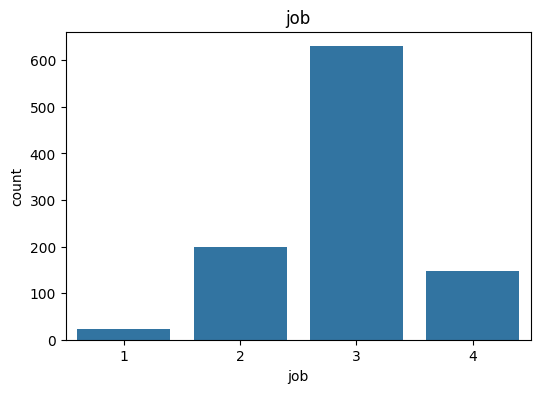

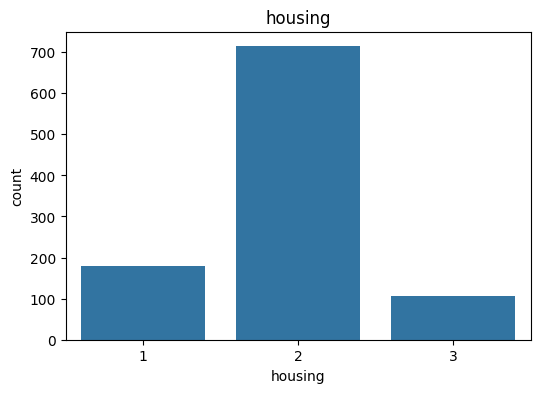

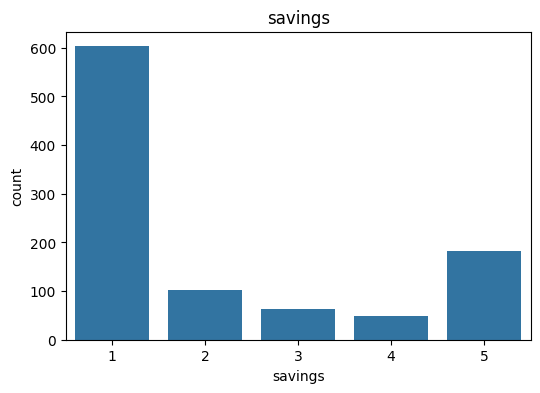

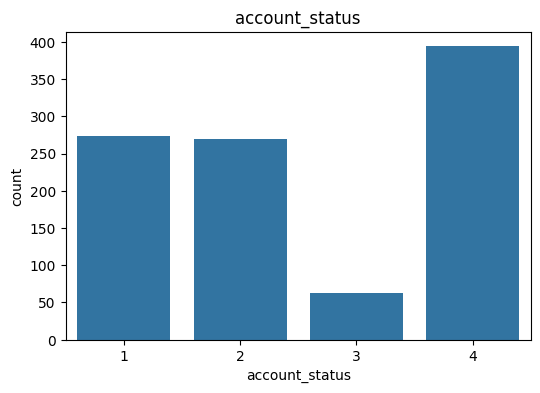

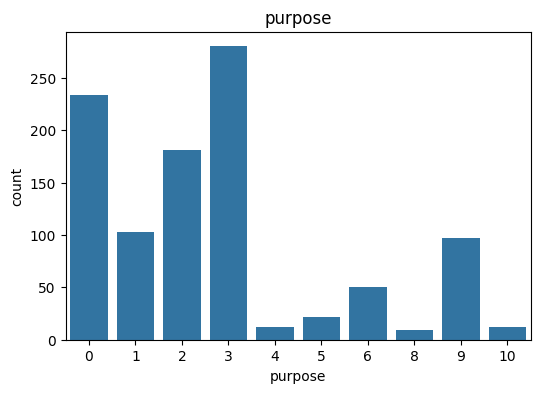

In [9]:
for col in ['job', 'housing', 'savings', 'account_status', 'purpose']:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col)
    plt.title(col)
    plt.show()

Here we can see that many of the people are skilled employees/officials and most of the people live on rent. Most of the people does not have saving account. Interesting about in account status is that there is a over 200DM or have a regular job but most of the people have account balance at 0 or does not have account at all. Most of the credit is for furniture/equipment. Then is for other and used and new car.

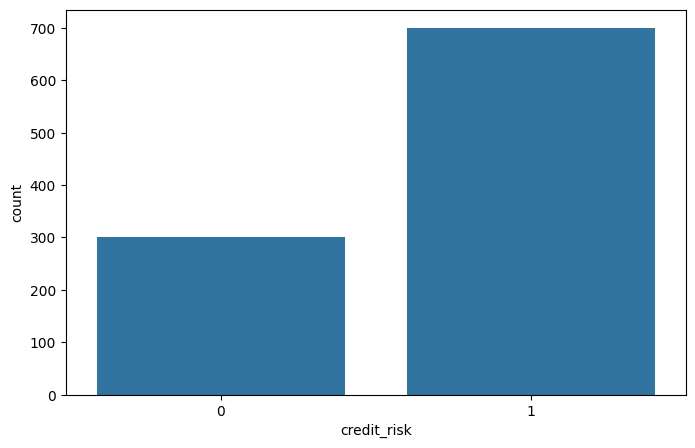

In [10]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='credit_risk')
plt.show()

<Axes: xlabel='purpose', ylabel='count'>

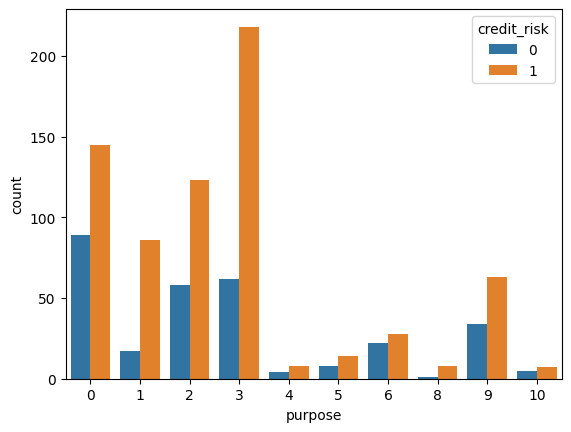

In [11]:
sns.countplot(data=df, x='purpose', hue='credit_risk')

<Axes: xlabel='credit_risk', ylabel='age'>

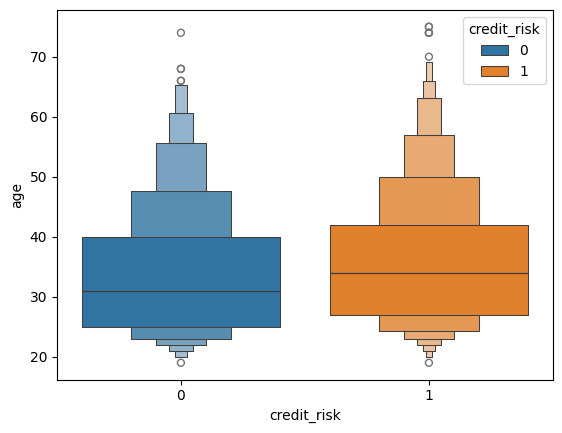

In [12]:
sns.boxenplot(data=df, x='credit_risk', y='age', hue='credit_risk')

<Axes: xlabel='job', ylabel='count'>

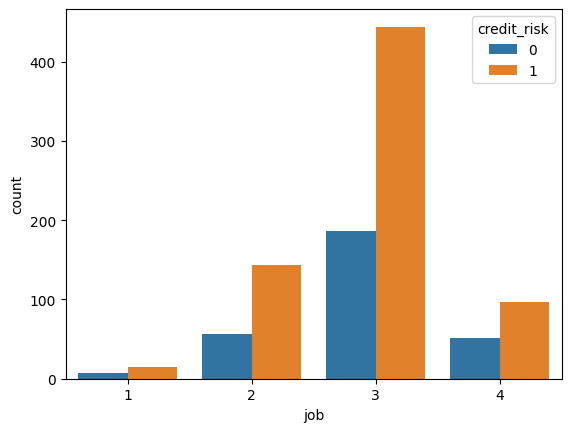

In [13]:
sns.countplot(data=df, x='job', hue='credit_risk')

<Axes: xlabel='credit_risk', ylabel='duration'>

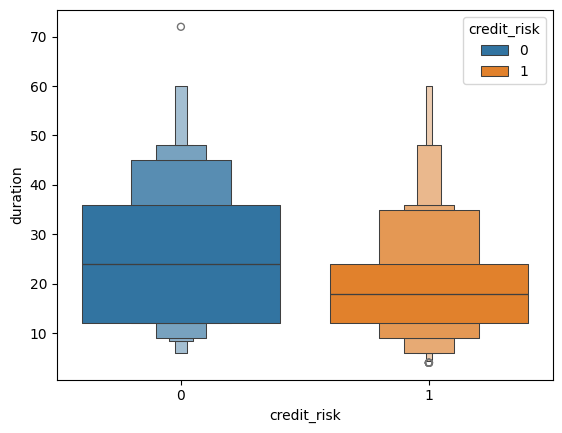

In [14]:
sns.boxenplot(data=df, x='credit_risk', y='duration', hue='credit_risk')

<Axes: xlabel='credit_risk', ylabel='amount'>

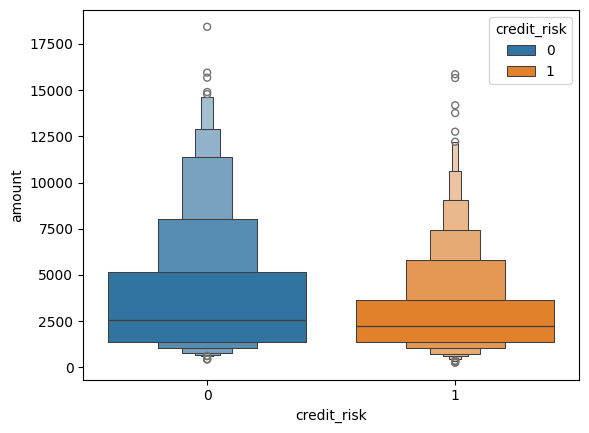

In [15]:
sns.boxenplot(data=df, x='credit_risk', y='amount', hue='credit_risk')

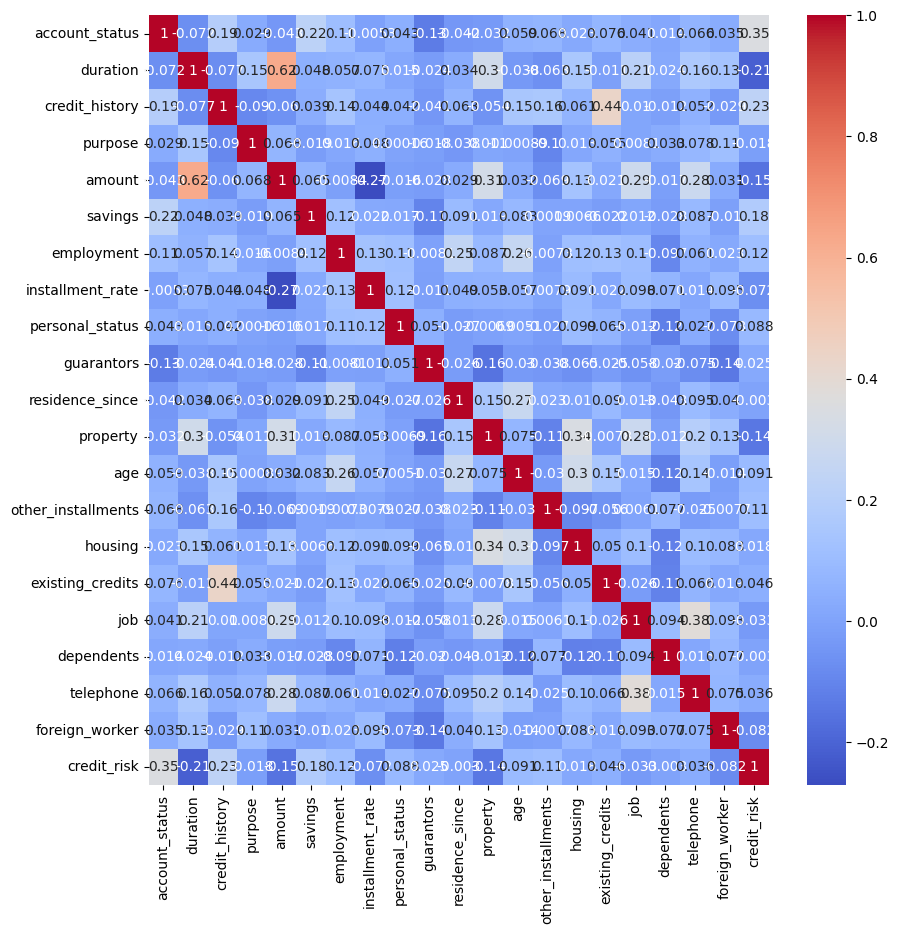

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

<Axes: xlabel='account_status', ylabel='count'>

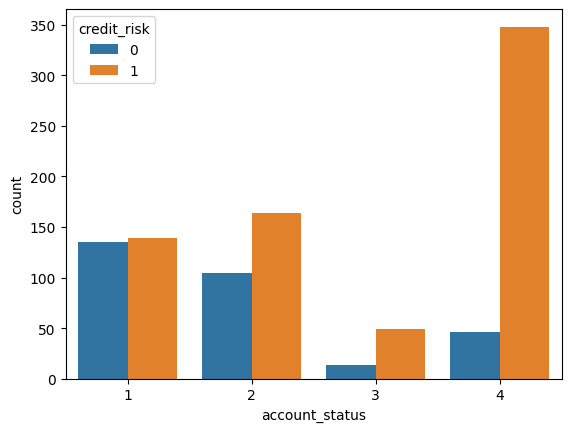

In [17]:
sns.countplot(data=df, x='account_status', hue='credit_risk')

<Axes: xlabel='savings', ylabel='count'>

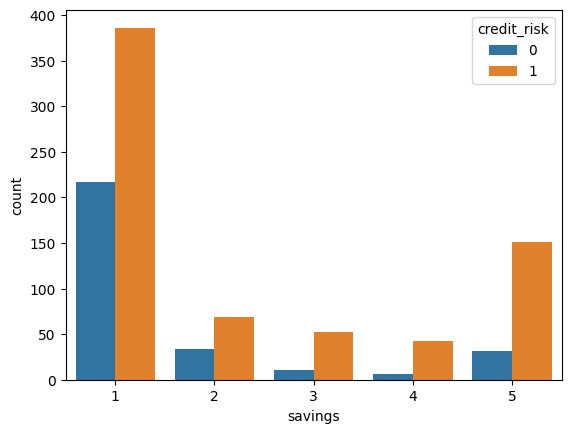

In [18]:
sns.countplot(data=df, x='savings', hue='credit_risk')

<Axes: xlabel='duration_bucket', ylabel='count'>

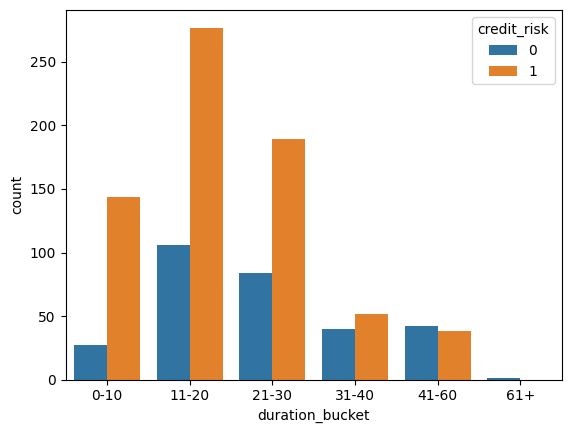

In [19]:
bins = [0, 10, 20, 30, 40, 60, 120]
labels = ['0-10', '11-20', '21-30', '31-40', '41-60', '61+']
df['duration_bucket'] = pd.cut(df['duration'], bins=bins, labels=labels, right=True, include_lowest=True)

sns.countplot(data=df, x='duration_bucket', hue='credit_risk')

<Axes: xlabel='existing_credits', ylabel='count'>

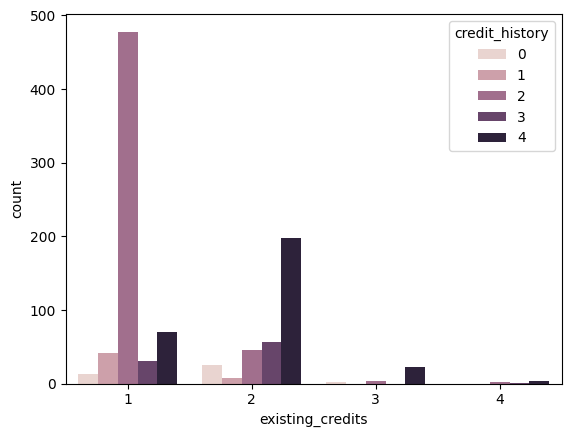

In [20]:
sns.countplot(data=df, x='existing_credits', hue='credit_history')

First we can see that many of the people are skilled employees/officials and most of the people live on rent. Most of the people does not have saving account. Interesting about in account status is that there is a over 200DM or have a regular job but most of the people have account balance at 0 or does not have account at all. Most of the credit is for furniture/equipment. Then is for other and used and new car. 70% of people have good credit risk and 30% have bad credit risk. Good credit risk people will mostly use credit for furniture/equiment, other and then use or new car. With bad credit risk it is bit different. They will get credit for other and then for used car or furniture/equiment and then there is also retraining in top 4. Credit risk age distribution is almost the same, with bad credit risk there is sligthly younger people. Job status top 4 is the same in both. But most of the good credit risk people are skilled/emlpoyeed. In credit risk duration we can see some separation. With good credit risk they mostly going to have shorter credit duration. With bad credit risk they have notable higher duration, median being 5 bigger. With good credit risk the amount they are going to take is mostly lower than bad credit risk people. With bad credit risk the amount they going to take is bigger, but the median is almost the same in both. On the correalation map we can see that there is good correlation between duration and amount and also between existing credits and credit history. In the plot we can see that most of the people have either 1 or 2-3 existing credits and these are mostly paid back duly or there is no credits taken before. Majority with good credit risk have 200 DM / salary. With bad credit risk there is no cheking account or the account has no money. In savings many of he peoples savings are unknown or they do not have any. But after that with good or bad credit risk there is there is good amount of money saved. In credit duration with good credit risk the most of the loans are between 11-20, 21-30 and then 0-10. With bad risk it is bit different, loans are between 11-20, 21-30 and 41-60. So the loans periods are much longer with bad credit risk people.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, roc_curve

In [67]:
# Droping duration_bucket column and creating new column wich is loan amount per duration
df = df.drop('duration_bucket', axis = 1)
df['amount_per_duration'] = df['amount'] / df['duration']
df['amount_per_duration'] = df['amount_per_duration'].round(2)

X = df.drop("credit_risk", axis = 1)
y = df["credit_risk"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size = 0.2, 
    random_state = 42, 
    stratify = y,
)

In [69]:
rf = RandomForestClassifier(
    n_estimators = 300,
    max_depth = None,
    random_state = 42,
    class_weight='balanced'
)

rf.fit(X_train, y_train)

probs = rf.predict_proba(X_test)[:,1]
preds = rf.predict(X_test)

precision, recall, thresholds = precision_recall_curve(y_test, probs)
auc = roc_auc_score(y_test, probs)

print(classification_report(y_test, preds))
print("AUC:", auc)

              precision    recall  f1-score   support

           0       0.78      0.48      0.60        60
           1       0.81      0.94      0.87       140

    accuracy                           0.81       200
   macro avg       0.80      0.71      0.73       200
weighted avg       0.80      0.81      0.79       200

AUC: 0.8264880952380953


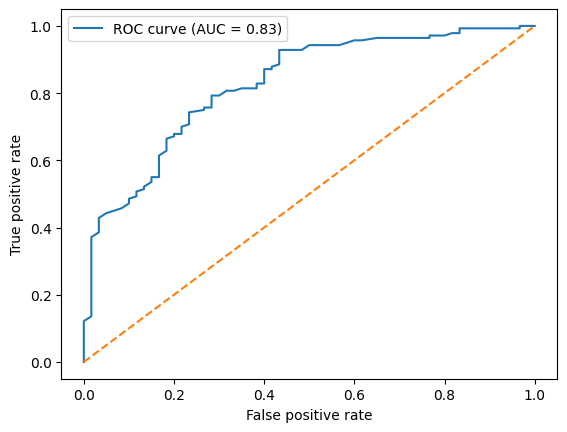

In [70]:
fpr, tpr, thresholds = roc_curve(y_test, probs)

plt.figure()
plt.plot(fpr, tpr, label = f"ROC curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

I used the random forest classifier to make predictions. This gives good picture wether to give loan or not. From the classification report and from plot, we can see that the model is performing pretty good with 81% accuracy.

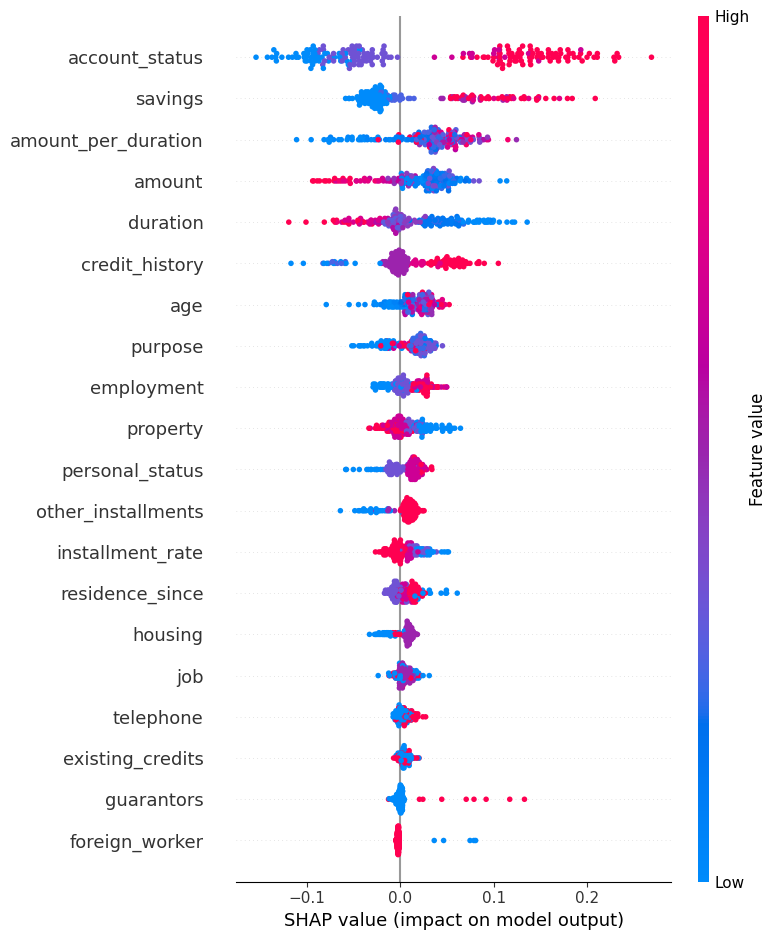

In [ ]:
explainer = shap.TreeExplainer(rf)

# Shap-arvot testidatalle
shap_values_3d = explainer.shap_values(X_test)

shap_values = shap_values_3d[:, :, 1]

shap.summary_plot(shap_values, X_test)


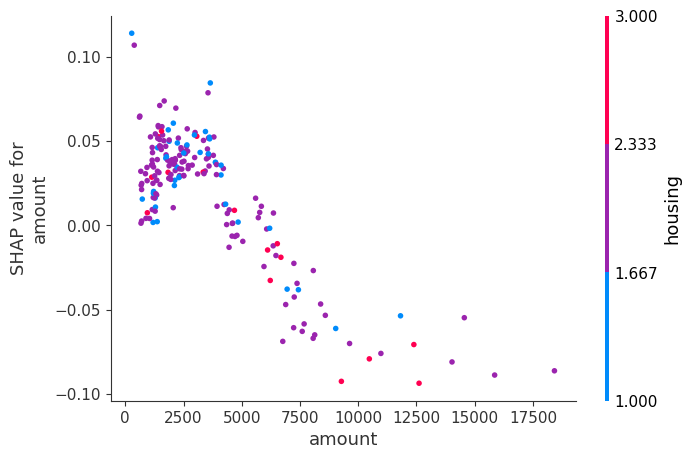

In [72]:
shap.dependence_plot("amount", shap_values, X_test)

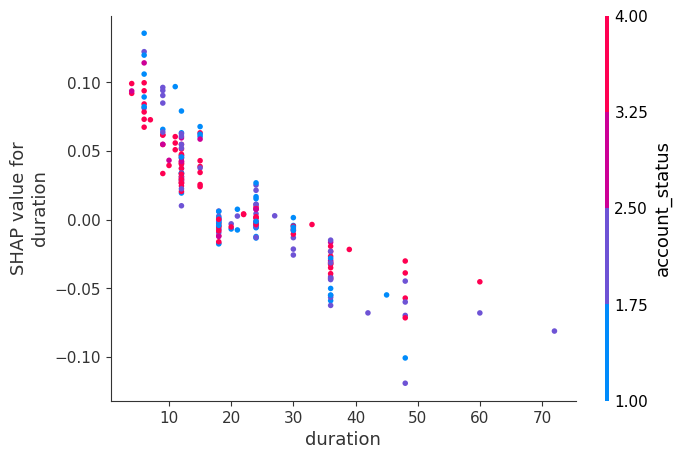

In [73]:
shap.dependence_plot("duration", shap_values, X_test)

From Shap plots we can see what is happening inside our model and what categories are the most important for the model. Second and third Shap plot shows us that with the small credit amount or duration there is positive shap value and that means that these will have better credit risk. The higer the amount or duration the risks rises and shap value goes to negative.

Making the model to predict better there would have to lot more data. With this amount of data the prediction is pretty good. Overall i would say that higer the amount or duration the risks rises and that affects the credit reability. Also the money people have allready on their account is a big dicension maker, account status also tells us that is the people out of job or not wich also is a huge factor for credit realibility.